## Linear Models

- Ordinary least squares
- Ridge regression and classification
- Lasso
- Multi-task Lasso
- Elastic-Net
- Multi-task Elastic-Net
- Least angle regression
- LARS Lasso
- Orthogonal matching pursuit(OMP)
- Bayesian regression
- Logistic regression
- Generalized linear regression
- Stochastic gradient descent(SGD)
- Perceptron
- Passive aggressive algorithms
- Robustness regression
- Polynomial regression

### Ordinary Least Squares

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2,2]], [0, 1, 2])
# fit을 하면 reg라는 모델이 coef와 intercept를 찾아내는 것이다.

In [ ]:
reg.coef_

#### diabetes example

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# column index 2 열만 feature로 사용한다.
diabetes_X = diabetes_X[:, np.newaxis, 2]
# np.newaxis했을 때 차이점은 => (행,) 이 아니라 (행,1) vector가 된다.
    # diabetes_X = diabetes_X[:, 2]
    # diabetes_X.shape
    
# train test split
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# ln object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

# coefs
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
     % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'
     % r2_score(diabetes_y_test, diabetes_y_pred))

# plot output
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Ridge

- 회귀계수 축소 => 임의로 지정한 alpha값 만큼 coefficient size에 penalty를 준다.
    - 결과적으로 coefficients become more robust to multi-collinearity.
- RidgeClassifier는 binary target을 -1, 1로 convert한 후에 위에서와 동일하게 regression task로 문제를 푼다.

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0,0],[0,0],[1,1]], [0,.1,1])

In [ ]:
reg.coef_, reg.intercept_

## Examples - Interpreting Coefficients

> In linear models, the target value is modeled as a linear combination of the features.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
survey = fetch_openml(data_id=534, as_frame=True)
survey.data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
529,18.0,no,male,5.0,not_member,29.0,White,Professional,Other,Unmarried
530,12.0,no,female,33.0,not_member,51.0,Other,Professional,Other,Married
531,17.0,no,female,25.0,member,48.0,Other,Professional,Other,Married
532,12.0,yes,male,13.0,member,31.0,White,Professional,Other,Married


In [3]:
X = survey.data[survey.feature_names]
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [4]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [5]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

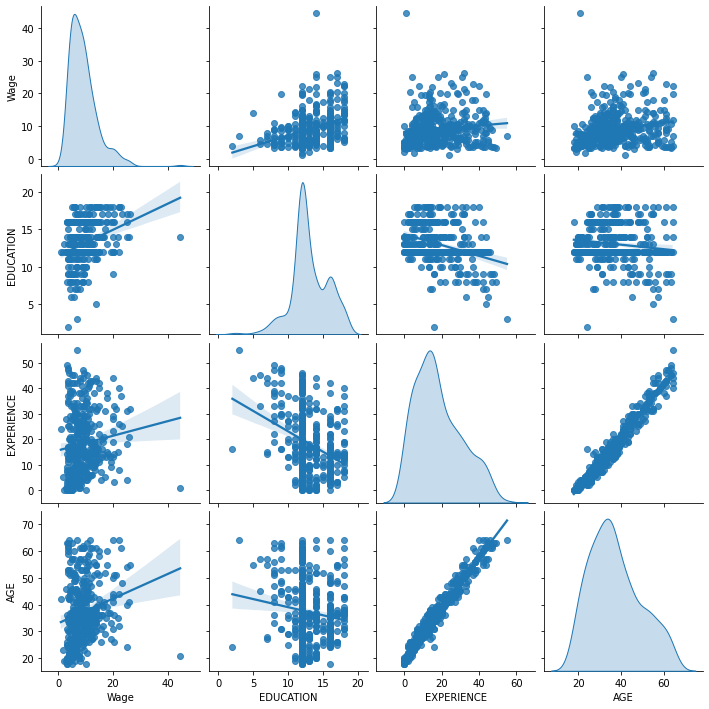

In [6]:
# visual insight
train_dataset = X_train.copy()
train_dataset.insert(0, "Wage", y_train)
    # 0번째 열에, y_train에 있는 'wage' column을 추가
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

#### one-hot-encoding
- to avoid categorical features to be treated as ordered values, we need to one-hot-encode them.

In [7]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.2 KB


In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                      'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),  # very small regularization
        func=np.log10,  # to model the logarithm of the WAGE
        inverse_func=sp.special.exp10
    )
)

In [15]:
_ = model.fit(X_train, y_train)

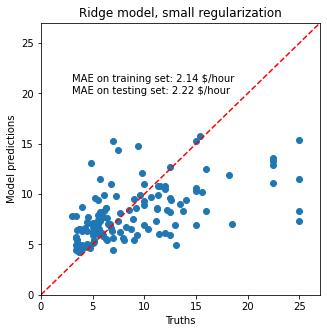

In [26]:
from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title('Ridge model, small regularization')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

#### one-hot-encoding 예시 2

In [35]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
cols = ['Fare', 'Embarked', 'Sex', 'Age']
X = df[cols]
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fare      6 non-null      float64
 1   Embarked  6 non-null      object 
 2   Sex       6 non-null      object 
 3   Age       5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder() # 범주형 변수를 "이항변수화"
imp = SimpleImputer() # imputation: 결측값 대체

**single imputation**
1. hot deck: 가장 많은 걸 넣는다 or 안변했을 것이다.
2. mean imputation: 평균값을 넣는다
3. regression imputation: 다른 값들로 회귀추정을 해서 넣는다.
    - regression imp 같은 경우는 fitted value를 넣다보니 계수추정치에 대한 신뢰도가 과대평가되는 경향이 있다.
4. stochastic regression imputation: 3번의 단점을 개선하기 위해 fitted value에 residual을 추가한 값을 넣는다.

> 그런데.. "결측대체값이면 관측값보다 더 약한 신뢰도를 가지게끔 만들어야 하는 거 아닌가???" 라는 의문이 든다.

**multiple imputation**
- 이게 위의 문제점을 해결하기 위해 나온 방법이다. (자세히는 to-research)

In [57]:
ct = make_column_transformer(
    (ohe, ['Embarked', 'Sex']), # categorical을 dummy 변수로 변환
    (imp, ['Age']),
    remainder='passthrough'
)
# column order: Embarked(3 cols), Sex(2 cols), Age(1 col), Fare(1 col)

In [58]:
ct.fit_transform(X)

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 26.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 35.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 35.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    , 31.2   ,  8.4583]])

### Lasso